# 🧹 Data Cleaning & Preparation

In [2]:
import pandas as pd


# Load CSVs
orders = pd.read_csv(r'C:\Users\kirak\OneDrive\Desktop\New folder\orders.csv')
players = pd.read_csv(r'C:\Users\kirak\OneDrive\Desktop\New folder\player.csv')
games = pd.read_csv(r'C:\Users\kirak\OneDrive\Desktop\New folder\games.csv')
gameproviders = pd.read_csv(r'C:\Users\kirak\OneDrive\Desktop\New folder\gameprovider.csv')
orders['createddate'] = pd.to_datetime(orders['createddate'])
players['createddate'] = pd.to_datetime(players['createddate'])

# Drop duplicates
orders.drop_duplicates(inplace=True)
players.drop_duplicates(inplace=True)
games.drop_duplicates(inplace=True)
gameproviders.drop_duplicates(inplace=True)
gameproviders = gameproviders.rename(columns={
    'name': 'providername',
    'createddate': 'provider_createddate',
    'updateddate': 'provider_updateddate',
})
games = games.rename(columns={
    'name': 'gamename'
})

# Check for nulls
print(orders.isnull().sum())

orderid                  0
brandid                  0
playerid                 0
gameproviderid           0
gameid                   0
roundid                  0
betamount                0
winamount                0
globaloperationtypeid    0
sessionid                0
devicetype               0
balanceafter             0
createddate              0
updateddate              0
bonusplayerid            0
bonusbalanceafter        0
dtype: int64


# 🔗 Merge Data for Analysis

In [3]:
orders_merged = orders.merge(players, left_on='playerid', right_on='id', how='left')
orders_merged = orders_merged.merge(games, left_on='gameid', right_on='id', how='left')
orders_merged = orders_merged.merge(gameproviders, left_on='providerid', right_on='id', how='left')
orders_merged['createddate'] = pd.to_datetime(orders_merged['createddate'])
orders_merged['order_month'] = orders_merged['createddate'].dt.to_period('M')

# 📊 Exploratory Data Analysis (EDA)

In [4]:
total_revenue = orders_merged['betamount'].sum()
print("Total Revenue:", total_revenue)

# Top 5 players by amount
top_players = orders_merged.groupby('username')['betamount'].sum().sort_values(ascending=False).head()
print(top_players)


Total Revenue: 2511753.98
username
user_1299    2270.22
user_153     2255.39
user_137     2125.50
user_1199    2115.57
user_341     2107.85
Name: betamount, dtype: float64


# ✅ 1. Total Revenue Trends Across Months

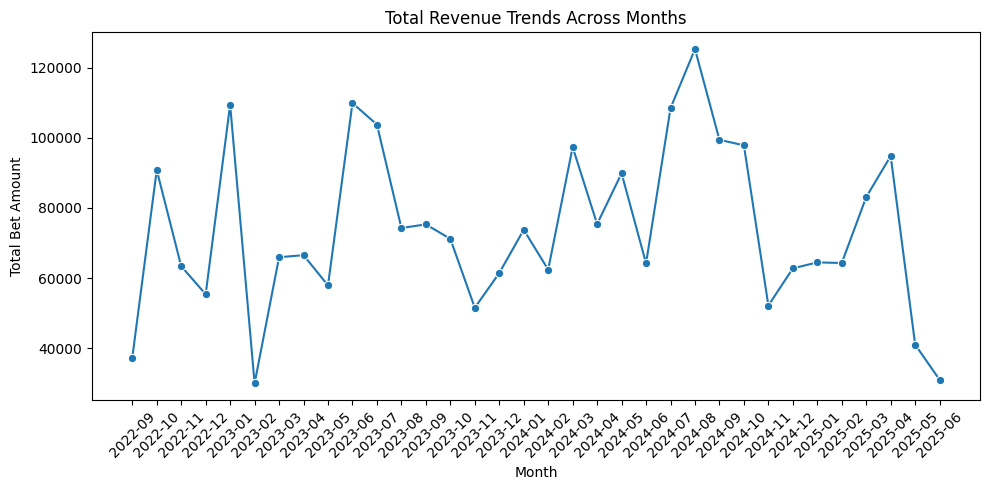

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


monthly_revenue = orders_merged.groupby('order_month')['betamount'].sum().reset_index()
monthly_revenue['order_month_str'] = monthly_revenue['order_month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='order_month_str', y='betamount', marker='o')
plt.title("Total Revenue Trends Across Months")
plt.xlabel("Month")
plt.ylabel("Total Bet Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 2. Most Active Players Based on Order Count

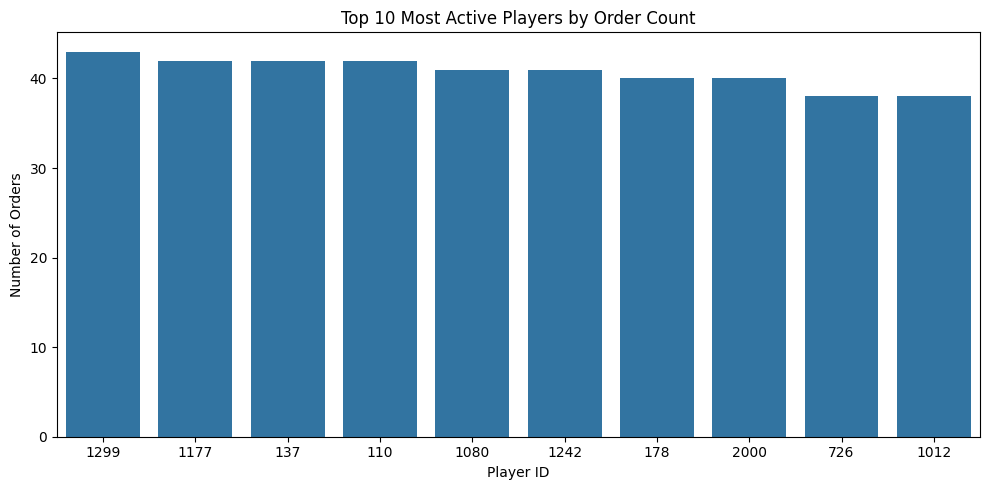

In [10]:
top_players = orders_merged['playerid'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_players.index.astype(str), y=top_players.values)
plt.title("Top 10 Most Active Players by Order Count")
plt.xlabel("Player ID")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# ✅ 3. Top Games and Providers by Total Bet Amount

# 🎮 Top Games:

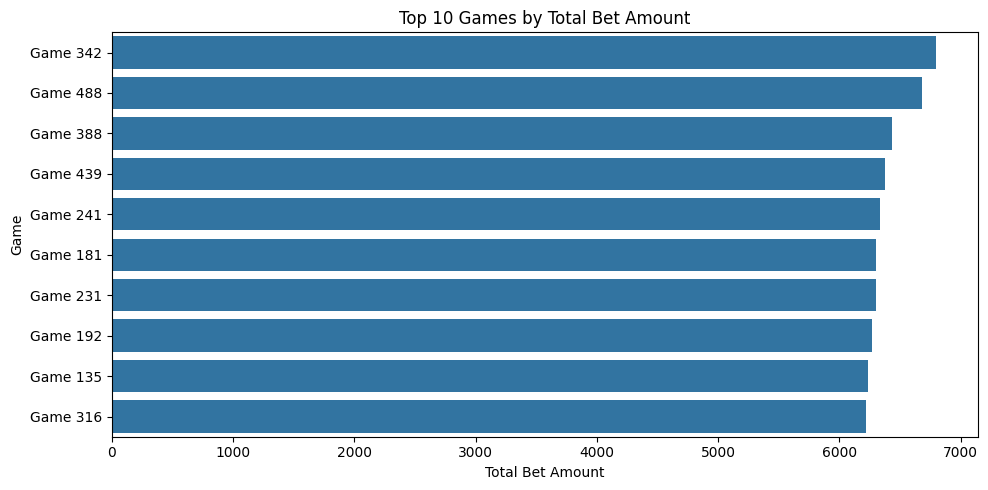

In [ ]:
top_games = orders_merged.groupby('gamename')['betamount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_games.values, y=top_games.index)
plt.title("Top 10 Games by Total Bet Amount")
plt.xlabel("Total Bet Amount")
plt.ylabel("Game")
plt.tight_layout()
plt.show()

# 🏢 Top Providers:

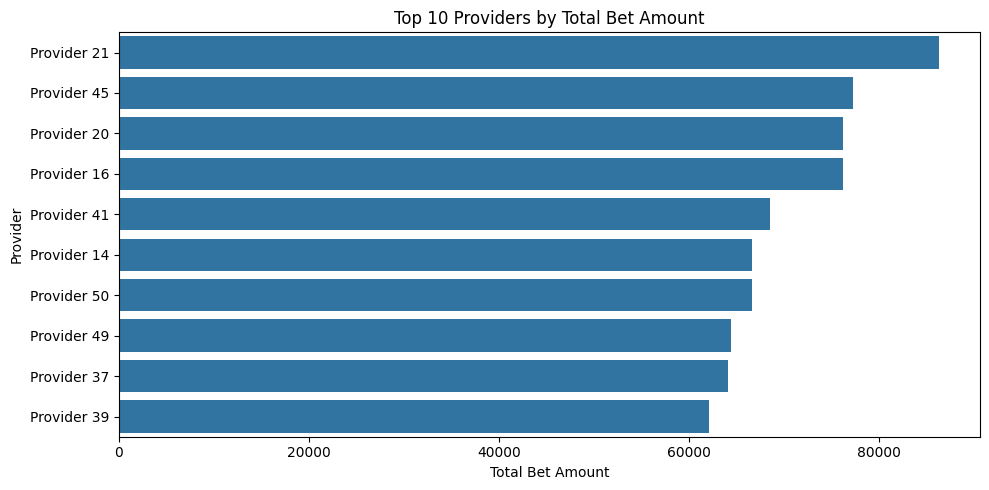

In [6]:
top_providers = orders_merged.groupby('providername')['betamount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_providers.values, y=top_providers.index)
plt.title("Top 10 Providers by Total Bet Amount")
plt.xlabel("Total Bet Amount")
plt.ylabel("Provider")
plt.tight_layout()
plt.show()

# ✅ 4. Visualization of Monthly Player Activity

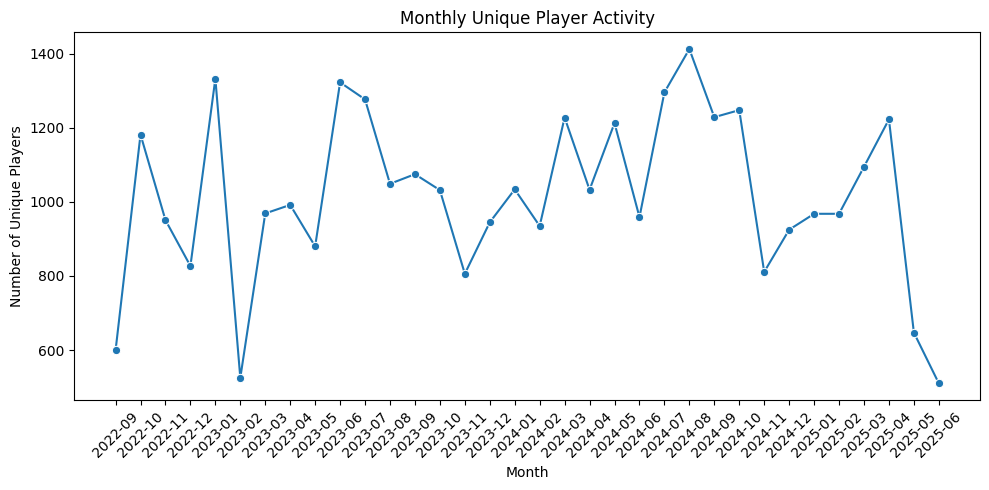

In [8]:
monthly_players = orders_merged.groupby('order_month')['playerid'].nunique().reset_index()
monthly_players['order_month_str'] = monthly_players['order_month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_players, x='order_month_str', y='playerid', marker='o')
plt.title("Monthly Unique Player Activity")
plt.xlabel("Month")
plt.ylabel("Number of Unique Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()